In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

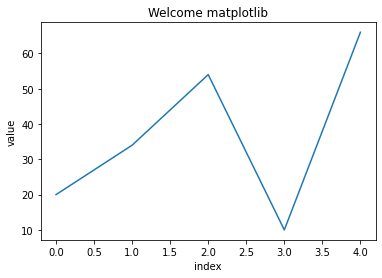

In [16]:
# matplotlib 로 그래프 그리기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot([0, 1, 2, 3, 4], [20, 34, 54, 10, 66])
plt.title("Welcome matplotlib")
plt.xlabel("index")
plt.ylabel("value")
plt.show()

In [17]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/lion/PART26/dataset/commerce.csv', encoding='unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [18]:
df['parse_InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['year_InvoiceDate'] = df['parse_InvoiceDate'].dt.year
df['month_InvoiceDate'] = df['parse_InvoiceDate'].dt.month
df['day_InvoiceDate'] = df['parse_InvoiceDate'].dt.day

# df_rows = len(df)
# df_cols = len(df.columns)
# df_names = df.columns.to_list()

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,parse_InvoiceDate,year_InvoiceDate,month_InvoiceDate,day_InvoiceDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,2011-12-09 12:50:00,2011,12,9
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2011-12-09 12:50:00,2011,12,9
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00,2011,12,9
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00,2011,12,9


{'boxes': [<matplotlib.lines.Line2D at 0x7fd5da14ab90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd5da0d0b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd5da0d9bd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd5da0d9690>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd5da0d0110>,
  <matplotlib.lines.Line2D at 0x7fd5da0d0650>]}

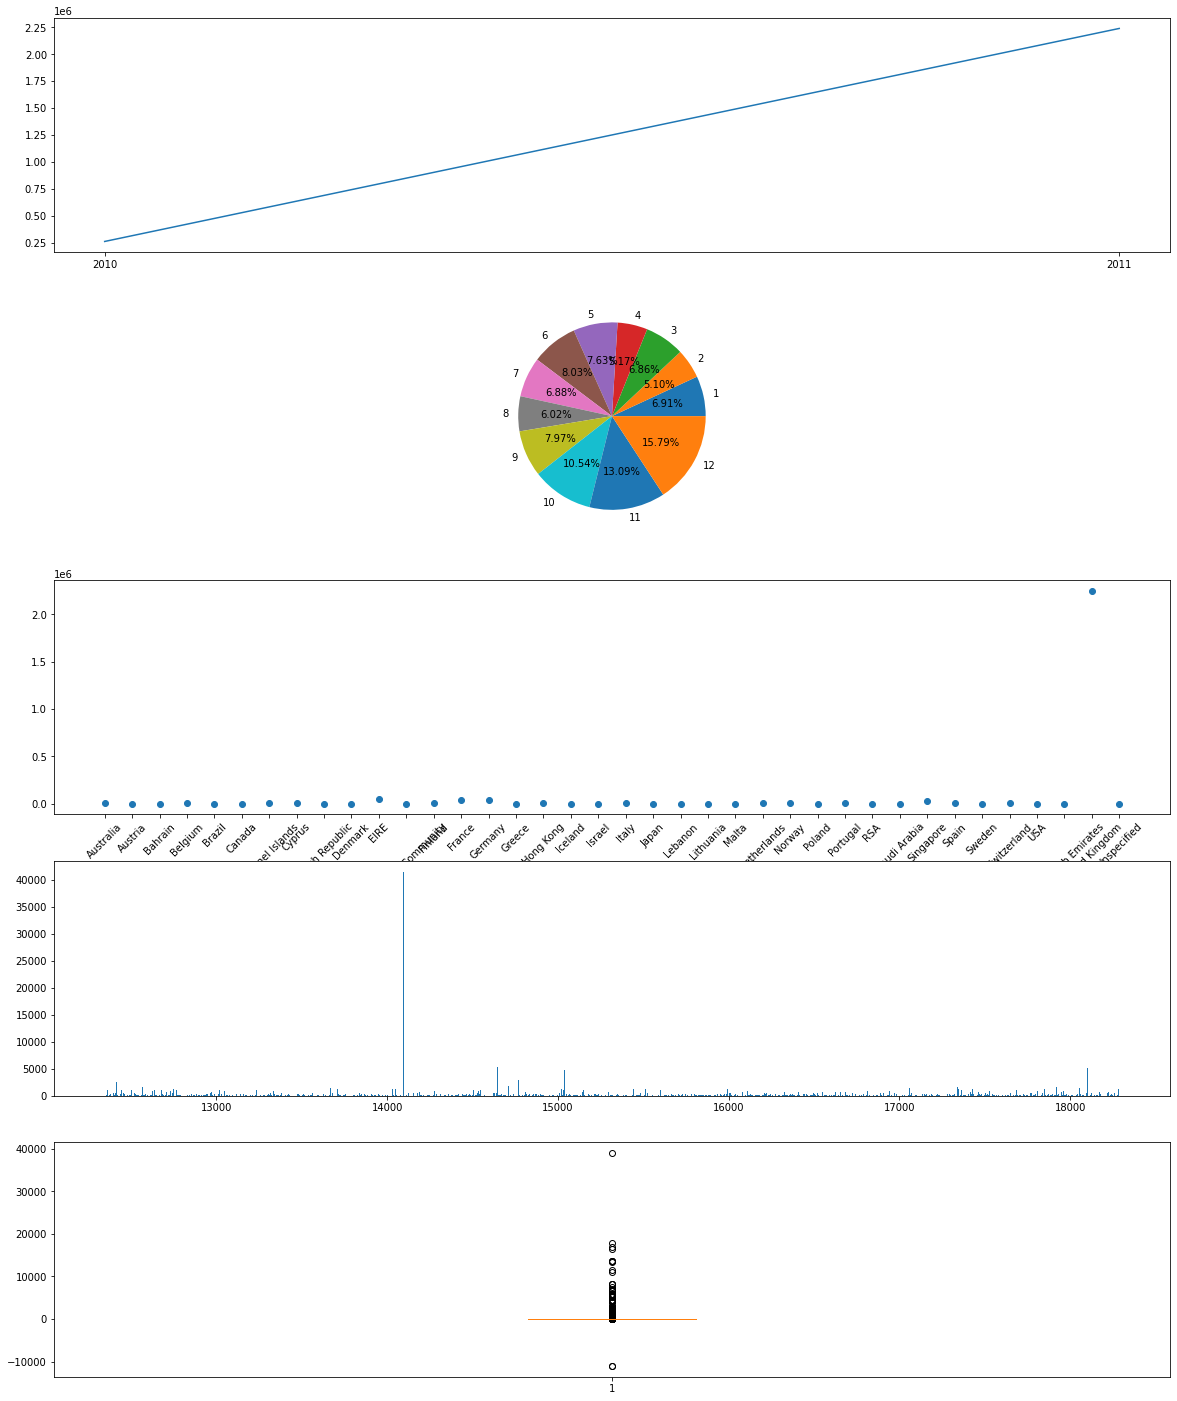

In [19]:
import numpy as np
import warnings

warnings.filterwarnings(action='ignore')
figure, ((ax1), (ax2), (ax3), (ax4), (ax5)) = plt.subplots(nrows=5, ncols=1)
figure.set_size_inches(20, 25)

year_InvoiceDate_sum = df.groupby('year_InvoiceDate').UnitPrice.sum()
ax1.plot(year_InvoiceDate_sum.index, year_InvoiceDate_sum.values)
ax1.set_xticks(np.unique(df["year_InvoiceDate"]))

month_InvoiceDate_sum = df.groupby('month_InvoiceDate').UnitPrice.sum()
# ax2.scatter(month_InvoiceDate_sum.index, month_InvoiceDate_sum.values)
ax2.pie( month_InvoiceDate_sum.values, labels=month_InvoiceDate_sum.index, autopct='%0.2f%%' )
# ax2.set_xticks(np.unique(df["month_InvoiceDate"]))

Country_sum = df.groupby('Country').UnitPrice.sum()
# ax3.pie(Country_sum.values, labels = Country_sum.index, autopct='%0.2f%%')
ax3.scatter(Country_sum.index, Country_sum.values)
ax3.set_xticklabels(np.unique(df["Country"]), rotation=45 )

CustomerID_sum = df.groupby('CustomerID').UnitPrice.sum()
ax4.bar(CustomerID_sum.index, CustomerID_sum.values)

ax5.boxplot(df['UnitPrice'])

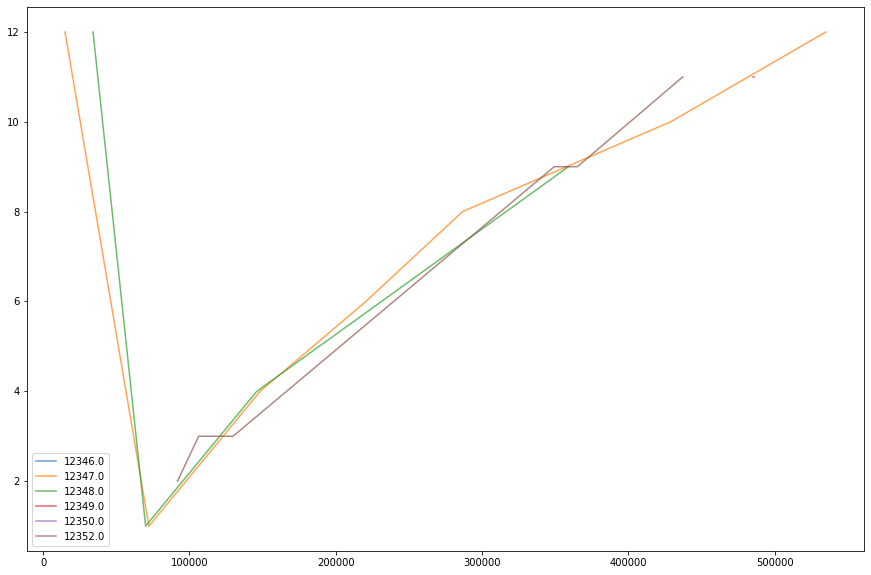

In [20]:
# 한 그래프에서 여러 선을 보여주기

# year_InvoiceDate_sum.index, year_InvoiceDate_sum.values
unique_customerid = np.unique(df['CustomerID'])
color_sharp = ['r.', 'b.', 'y.', 'm.', 'g.', 'k.', 'c.']

plt.figure(figsize=(15, 10))

for i in range( 6 ) :
  plt.plot( df[(df['CustomerID'] == unique_customerid[i])].month_InvoiceDate, alpha=0.7)
  # plt.plot( df[(df['CustomerID'] == 17850.0)].month_InvoiceDate, 'r.' )
  # plt.plot( df[(df['CustomerID'] == 12680.0)].month_InvoiceDate, 'b.' )

plt.legend(unique_customerid[0:6])
plt.show()

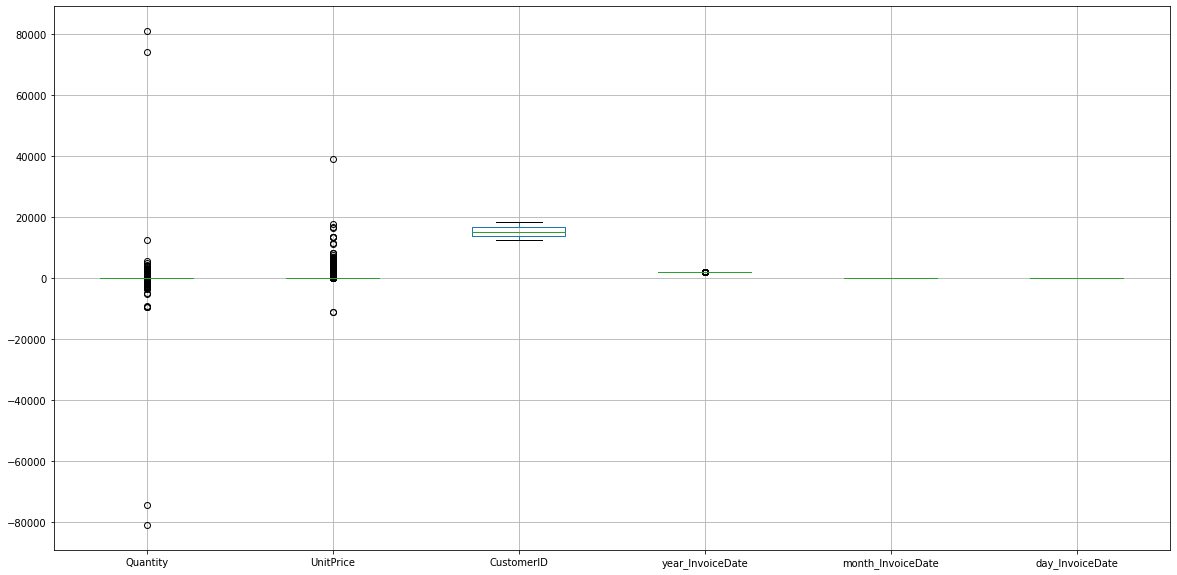

In [21]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

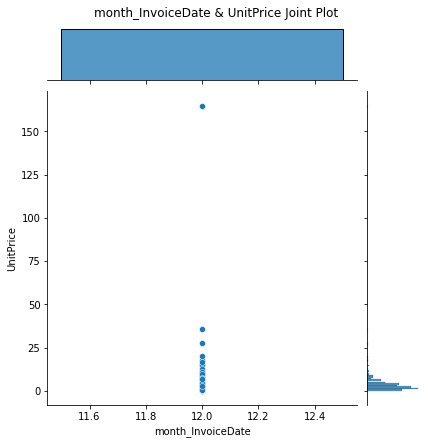

In [22]:
import seaborn as sns

sns.jointplot(x="month_InvoiceDate", y="UnitPrice", data=df.loc[0:300])
plt.suptitle("month_InvoiceDate & UnitPrice Joint Plot", y=1.02)
plt.show()

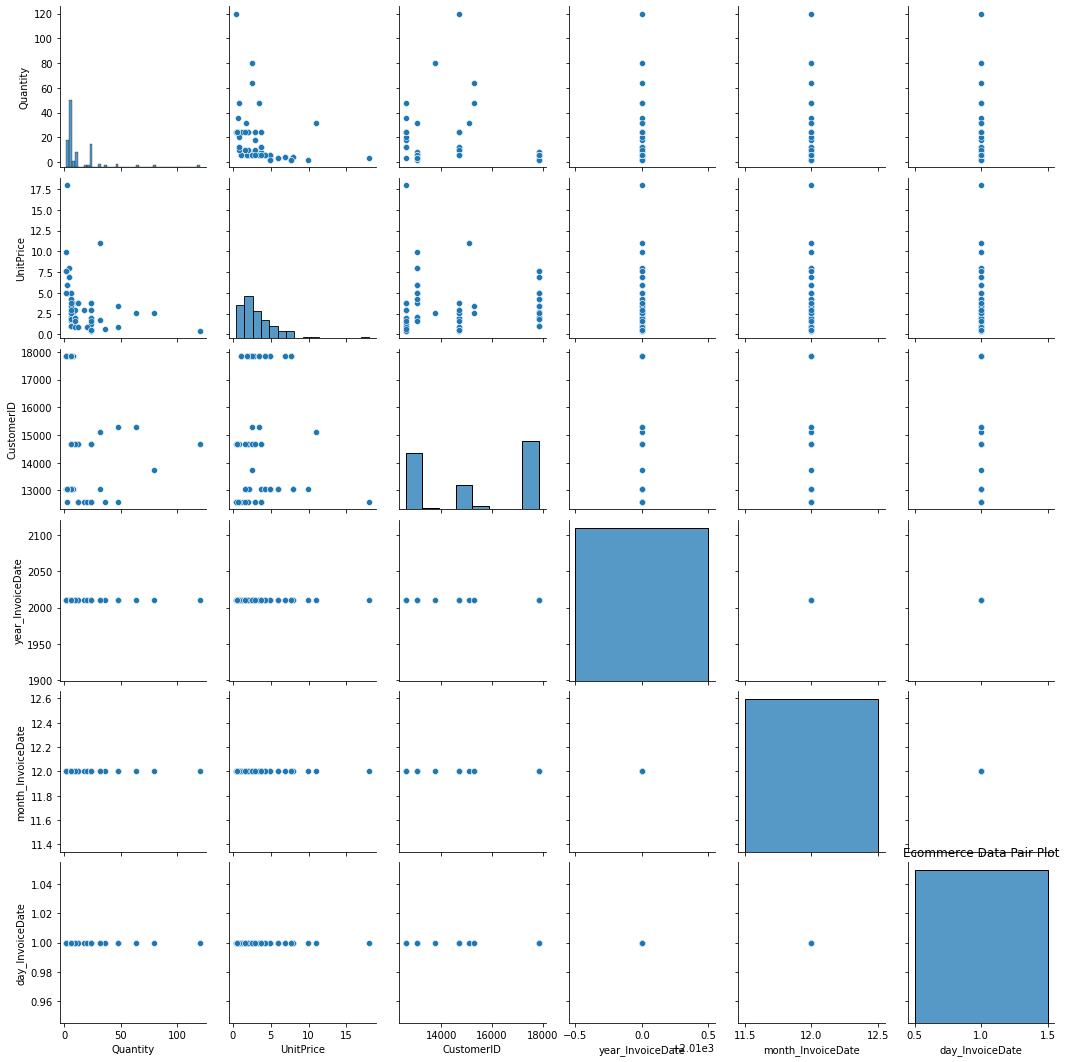

In [23]:
sns.pairplot(df.loc[0:100])
plt.title("Ecommerce Data Pair Plot")
plt.show()
